In [1]:
#导入区域数据
import os
import numpy as np
import pandas as pd

#file path in windows
path = r'G:\china_geodata\yunnan_region\yn_all.csv'
data = pd.read_csv(path,encoding="gb2312")


In [2]:
#c:n boxplot
import matplotlib.pyplot as plt
from pylab import *
cn_80_crop = data['cn80'][data['lucc80'] == 1]
cn_80_for = data['cn80'][data['lucc80'] == 2]
cn_80_gra = data['cn80'][data['lucc80'] == 3]
cn_10_crop = data['cn_rate'][data['lucc10'] == 1]
cn_10_for = data['cn_rate'][data['lucc10'] == 2]
cn_10_gra = data['cn_rate'][data['lucc10'] == 3]
dt = [cn_80_crop, cn_80_for, cn_80_gra]
dt1 = [cn_10_crop, cn_10_for, cn_10_gra]
import scipy.stats as stats
for i in range(3):
    
    stat_val, p_val = stats.ttest_ind(dt[i], dt1[i], equal_var=False)
    print('cn第%d组数据 P=%.3f'%(i,p_val))

cn第0组数据 P=0.000
cn第1组数据 P=0.000
cn第2组数据 P=0.000


In [3]:
np_80_crop = data['np80'][data['lucc80'] == 1]
np_80_for = data['np80'][data['lucc80'] == 2]
np_80_gra = data['np80'][data['lucc80'] == 3]
np_10_crop = data['np_rate'][data['lucc10'] == 1]
np_10_for = data['np_rate'][data['lucc10'] == 2]
np_10_gra = data['np_rate'][data['lucc10'] == 3]
dt2 = [np_80_crop[np_80_crop>0], np_80_for[np_80_for>0], np_80_gra[np_80_gra>0]]
dt3 = [np_10_crop[np_10_crop>0], np_10_for[np_10_for>0], np_10_gra[np_10_gra>0]]
for i in range(3):    
    stat_val, p_val = stats.ttest_ind(dt2[i], dt3[i], equal_var=False)
    print('N:P第%d组数据 P=%f'%(i,p_val))

N:P第0组数据 P=0.000000
N:P第1组数据 P=0.000000
N:P第2组数据 P=0.000000


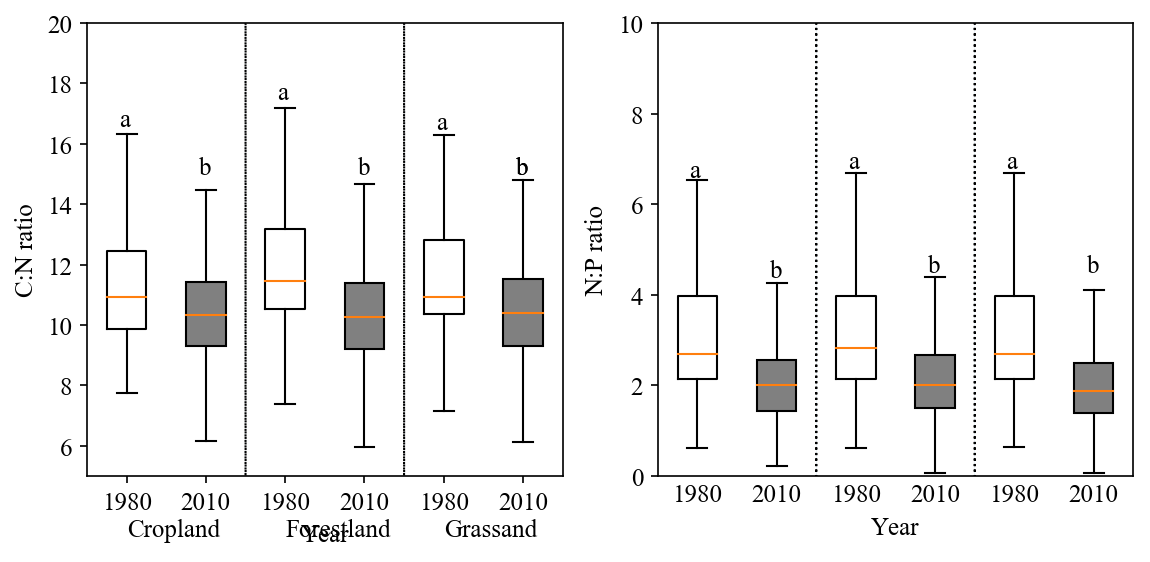

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), dpi=150)
# c:n ratio
axes[0].boxplot(dt,positions= [1, 3, 5], showfliers=False,)
#axes[0].set_title('Rectangular box plot')

axes[0].boxplot(dt1,positions= [2, 4, 6], showfliers=False, patch_artist=True, 
      boxprops=dict(facecolor='grey') )

rc('font', family='serif', serif='Times New Roman', size=12)
#
axes[0].set_ylim(5,20)
axes[0].set_xlim(0.5,6.5)
axes[0].arrow(2.5,0,0,20,ls=':')
axes[0].arrow(4.5,0,0,20,ls=':')
label=('1980', '2010', '1980', '2010', '1980', '2010')
axes[0].set_xticks([1, 2, 3, 4, 5, 6])
axes[0].set_xticklabels(label)
axes[0].text(1, 3, 'Cropland')
axes[0].text(3, 3, 'Forestland')
axes[0].text(5, 3, 'Grassand')
axes[0].text(0.9, 16.6, 'a')
axes[0].text(1.9, 15, 'b')
axes[0].text(2.9, 17.5, 'a')
axes[0].text(3.9, 15, 'b')
axes[0].text(4.9, 16.5, 'a')
axes[0].text(5.9, 15, 'b')
axes[0].text(5.9, 15, 'b')

tick_params(which='major',axis='x', length=0)
axes[0].set_ylabel('C:N ratio',)
axes[0].set_xlabel('Year')

# n:p ratio
axes[1].boxplot(dt2,positions= [1, 3, 5], showfliers=False,)
axes[1].set_xticklabels( label)

axes[1].boxplot(dt3,positions= [2, 4, 6], showfliers=False, patch_artist=True, 
      boxprops=dict(facecolor='grey') )

rc('font', family='serif', serif='Times New Roman')
#
axes[1].set_ylim(0,10)
axes[1].set_xlim(0.5,6.5)
axes[1].arrow(2.5,0,0,20,ls=':')
axes[1].arrow(4.5,0,0,20,ls=':')
label=('1980', '2010', '1980', '2010', '1980', '2010')
axes[1].set_xticks([1, 2, 3, 4, 5, 6])
axes[1].set_xticklabels(label)

axes[1].text(0.9, 6.6, 'a',)
axes[1].text(1.9, 4.4, 'b',)
axes[1].text(2.9, 6.8, 'a',)
axes[1].text(3.9, 4.5, 'b')
axes[1].text(4.9, 6.8, 'a',)
axes[1].text(5.9, 4.5, 'b',)


tick_params(which='major',axis='x', length=0)
axes[1].set_ylabel('N:P ratio')
axes[1].set_xlabel('Year')

plt.savefig(r'G:\china_geodata\yunnan_region\参考文章\文中图\cnp_boxplot.tif')
plt.show()

In [659]:
#95% confidence
import scipy as sp
import scipy.stats
cn_crop = data['cn_ch'][data['lucc10'] == 1]
cn_for = data['cn_ch'][data['lucc10'] == 2]
cn_gra = data['np_ch'][data['lucc10'] == 3]
np_crop = data['np_ch'][data['lucc10'] == 1]
np_for = data['np_ch'][data['lucc10'] == 2]
np_gra = data['np_ch'][data['lucc10'] == 3]
def ci_t(data,confidence=0.95):
    sample_mean = np.mean(data)
    sample_std = np.std(data,ddof=1)    
    sample_size = len(data)
    alpha = 1 - confidence
    t_score = scipy.stats.t.isf(alpha / 2, df = (sample_size-1) )

    ME = t_score * sample_std / np.sqrt(sample_size)
    lower_limit = sample_mean - ME
    upper_limit = sample_mean + ME

    #print( str(confidence*100)+ '%% Confidence Interval: ( %.2f, %.2f)' % (lower_limit, upper_limit))
    return lower_limit, upper_limit
ratio = [cn_80_crop, cn_80_for ,cn_80_gra ,cn_10_crop,cn_10_for, cn_10_gra, np_80_crop,np_80_for,\
         np_80_gra,np_10_crop,np_10_for,np_10_gra,cn_crop, cn_for,cn_gra,np_crop,np_for,np_gra]
for i in ratio:
    a, b = ci_t(i)
    print('%.2f(%.2f, %.2f) '%(i.mean(),a, b))
    

11.17(11.07, 11.28) 
11.70(11.61, 11.80) 
11.40(11.27, 11.53) 
10.48(10.38, 10.58) 
10.37(10.27, 10.46) 
10.57(10.44, 10.70) 
2.99(2.94, 3.05) 
3.20(3.14, 3.26) 
3.00(2.93, 3.07) 
2.13(2.09, 2.18) 
2.22(2.17, 2.27) 
2.05(1.99, 2.11) 
-0.81(-0.95, -0.66) 
-1.38(-1.52, -1.24) 
-0.92(-1.00, -0.83) 
-0.88(-0.96, -0.81) 
-1.01(-1.09, -0.93) 
-0.92(-1.00, -0.83) 
